# **Verifiable Support Vector Machine**

The Support Vector Machines (SVM) model is a supervised learning technique used for classification and regression. It is employed to solve binary classification problems where it identifies the hyperplane that best divides a data set into classes. This hyperplane results from maximizing the margin between the two classes. By determining this optimal hyperplane, predictions can be made for new data points and understand how the input attributes influence classification.

Below, we provide a brief review of implementing an SVM model using the Gradient Descent method for the linear kernel in Python, which we will later convert to Cairo to transform it into a verifiable ZKML (support vector machine model), using Orion's library. This allows an opportunity to familiarize oneself with the main functions and operators that the framework offers for the implementation of the SVM.

###  **DataSet Generate**  

For the purposes of this tutorial, we generated linearly separable data using make_blobs from Scikit-learn

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X_train = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2],
    [4.7, 3.2, 1.3, 0.2],
    [4.6, 3.1, 1.5, 0.2],
    [5.0, 3.6, 1.4, 0.2],
    [5.4, 3.9, 1.7, 0.4],
    [4.6, 3.4, 1.4, 0.3],
    [5.0, 3.4, 1.5, 0.2],
    [4.4, 2.9, 1.4, 0.2],
    [4.9, 3.1, 1.5, 0.1],
    [7.0, 3.2, 4.7, 1.4],
    [6.4, 3.2, 4.5, 1.5],
    [6.9, 3.1, 4.9, 1.5],
    [5.5, 2.3, 4.0, 1.3],
    [6.5, 2.8, 4.6, 1.5],
    [5.7, 2.8, 4.5, 1.3],
    [6.3, 3.3, 4.7, 1.6],
    [4.9, 2.4, 3.3, 1.0],
    [6.6, 2.9, 4.6, 1.3],
    [5.2, 2.7, 3.9, 1.4],
])
y_train = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
])

X_test, y_test = X_train, y_train

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20, 4) (20,) (20, 4) (20,)


Now we will visualize the training data using a scatter plot, where the points are colored based on their class labels, which in our case will be 1 and -1

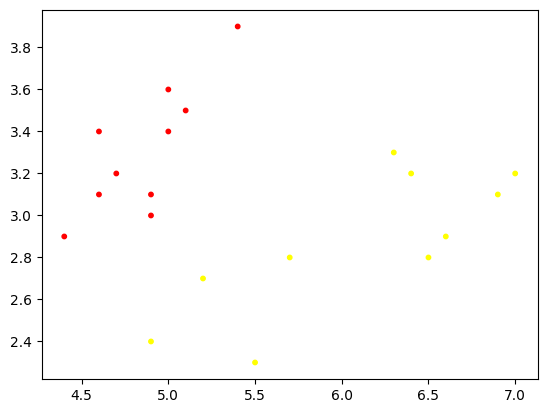

In [60]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap='autumn')

### **Loss function, gradient and Weight init** 

We will start by generating the key functions for SVM.

Next, we'll define the loss functions and its gradient, with $\mathbf{L2}$ regularization, both necessary to train our SVM.

In the case of the loss function in SVM, the Hinge Loss ($\max(0, 1 - y_i \times (\mathbf{w} \cdot \mathbf{x}_i))$) is used, which measures how far a sample is on the "wrong side" of the margin. If the sample is on the correct side of the margin, the loss is 0.

$\text{Loss Function}$  = $ \frac{1}{N} \sum_{i=1}^{N} \max(0, 1 - y_i \times (\mathbf{w} \cdot \mathbf{x}_i)) + C \times \frac{1}{2} \times \mathbf{w} \cdot \mathbf{w}$

$\text{Gradient}$  =  $\frac{1}{N} \sum_{i=1}^{N} \left( -y_i \times \mathbf{x}_i \text{ (si } y_i \times (\mathbf{w} \cdot \mathbf{x}_i) < 1 \text{) } \right) + C \times \mathbf{w}$

For the purposes of this tutorial, we initialize $\mathbf{w}$ as an array of $\mathbf{0's}$

In [61]:
def loss_function(w, X, y, C):  
    hinge_loss = np.maximum(0, 1 - y * np.dot(X, w)) 
    regularization_term = 0.5 * np.dot(w, w)  # Regularización L2 ###
    total_loss = np.mean(hinge_loss) + C * regularization_term ###
    return total_loss

def loss_gradient(w, X, y, C):     
    mask = (y * (np.dot(X, w))) < 1    #<1
    gradient = (-np.dot(mask * y, X) / len(y)) +  C*w
    return gradient

# Gradiente descendente
losses = []
w = np.zeros(4)

###  **Initial hyperparameters** 

Now, we declare the hyperparameters: learning rate (learning_rate), the number of epochs (num_epochs), and the regularization parameter (C). Then, we will use gradient descent to adjust the weights of the SVM model. For the purposes of this tutorial, we stick with the following hyperparameters; however, the hyperplane acquisition could be improved with their adjustment.

In [62]:
learning_rate = 0.01
num_epochs = 100
C = 1

### **Training** 

In [63]:
for epoch in range(num_epochs):
    loss = loss_function(w,X_train, y_train, C)
    losses.append(loss)

    if epoch % 25 == 0 or epoch  == 99:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

    gradient_w = loss_gradient(w, X_train, y_train,C)
    w -= learning_rate * gradient_w
print

Epoch 0, Loss: 1.0000
Epoch 25, Loss: 0.6120
Epoch 50, Loss: 0.4570
Epoch 75, Loss: 0.3673
Epoch 99, Loss: 0.3321


<function print>

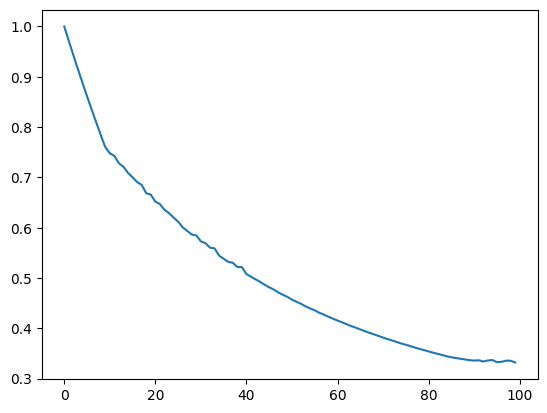

In [64]:
plt.plot(losses)

After training the model and observing the decrease of the loss function, we evaluate its performance on both the training and test data. We will calculate the accuracy and display the final loss on the training data. In our case, the weights $\mathbf{w}$ and the accuracies will be the values against which we compare the SVM implementation in Cairo with Orion.

###  **Evaluate model on training data** 

In [65]:
def predict(X, w):
    return np.sign(np.dot(X, w))

predictions = predict(X_train, w)
final_loss = loss_function(w, X_train, y_train,C)

print("Accuracy: {}".format((predictions == y_train).mean()))
print("Final loss: {}".format(final_loss))

Accuracy: 1.0
Final loss: 0.33203926332997136


###  **Evaluate model on test data**

In [66]:
predictions = predict(X_test, w)

print("Accuracy: {}".format((predictions == y_test).mean()))

Accuracy: 1.0


In [67]:
w

array([-0.11463491, -0.35595999,  0.53122158,  0.24240275])

Next, we will visualize the obtained hyperplane, determined by $\mathbf{w} = (-0.11463491, -0.35595999,  0.53122158,  0.24240275)$ and the way it separates the classes in the test data.

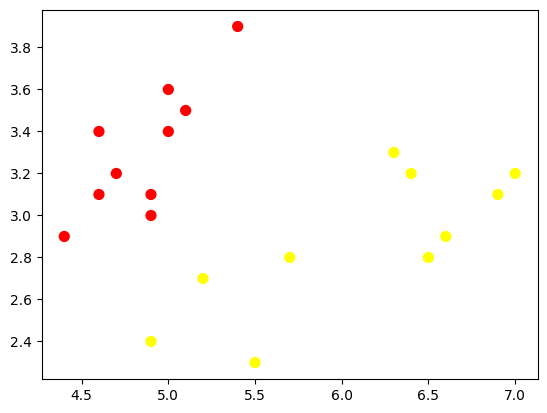

In [68]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')

## **Convert your model to Cairo**

### **Generating Cairo files**

Now let's generate Cairo files for each tensor in the object.

In [69]:
def decimal_to_fp16x16(num):

    whole_num = int(num)
    fractional_part = int((num - whole_num) * 65536)
    fp_number = (whole_num << 16) + fractional_part
    return fp_number

In [70]:
import os

In [72]:
tensor_name = ["X_train", "Y_train", "X_test", "Y_test", "W"]

base_path = os.path.join("../../src")

def generate_cairo_files(data, name):
    generated_path = os.path.join(base_path, 'generated')
    os.makedirs(generated_path, exist_ok=True)

    with open(os.path.join(base_path, 'generated', f"{name}.cairo"), "w") as f:
        f.write(
            "use array::ArrayTrait;\n" +
            "use orion::operators::tensor::{Tensor, TensorTrait, FP16x16Tensor};\n" +
            "use orion::numbers::{FixedTrait, FP16x16, FP16x16Impl};\n" +
            "\n" + f"fn {name}() -> Tensor<FP16x16>" + "{\n\n" + 
            "let mut shape = ArrayTrait::new();\n"
        )
        for dim in data.shape:
            f.write(f"shape.append({dim});\n")
    
        f.write("let mut data = ArrayTrait::new();")
        for val in np.nditer(data.flatten()):
            f.write(f"data.append(FixedTrait::new({abs(int(decimal_to_fp16x16(val)))}, {str(val < 0).lower()}));\n")
        f.write(
            "let tensor = TensorTrait::<FP16x16>::new(shape.span(), data.span());\n" +
            "return tensor;\n}"
        )

with open(os.path.join(base_path, 'generated.cairo'), 'w') as f:
    for n in tensor_name:
        f.write(f"mod {n};\n")

generate_cairo_files(X_train, "X_train")
generate_cairo_files(X_test, "X_test")
generate_cairo_files(y_train, "Y_train")
generate_cairo_files(y_test, "Y_test")
generate_cairo_files(w, "W")

 **Convert hyperparameters to FP16x16**


In [73]:
print(decimal_to_fp16x16(learning_rate))
print(decimal_to_fp16x16(C))
print(decimal_to_fp16x16(num_epochs))

655
65536
6553600


 **Get an estimate for the initial and final loss value, and final weights in FP16x16**  

In [74]:
w = np.array([decimal_to_fp16x16(w[0]),
decimal_to_fp16x16(w[1]),
decimal_to_fp16x16(w[2])])

print("Initial loss: {}".format(decimal_to_fp16x16(losses[0])))
print("Final loss: {}".format(decimal_to_fp16x16(final_loss)))
print("Weights: {}".format(w))

Initial loss: 65536
Final loss: 21760
Weights: [ -7512 -23328  34814]


In [75]:
! touch ../../src/helper.cairo

In [77]:
%%writefile ../../src/helper.cairo

use debug::PrintTrait;
use traits::TryInto;
use array::{ArrayTrait, SpanTrait};
use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, FP16x16TensorAdd, FP16x16TensorMul, FP16x16TensorSub,
    FP16x16TensorDiv
};
use orion::numbers::{FixedTrait, FP16x16, FP16x16Impl};
use orion::numbers::fixed_point::implementations::fp16x16::core::{
    HALF, ONE, FP16x16Mul, FP16x16Div, FP16x16Print, FP16x16IntoI32, FP16x16PartialOrd,
    FP16x16PartialEq
};


// Returns an element-wise indication of the sign of a number.
fn sign(z: @Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut data_result = ArrayTrait::<FP16x16>::new();
    let mut z_data = *z.data;

    loop {
        match z_data.pop_front() {
            Option::Some(item) => {
                let result = if *item.sign {
                    FixedTrait::new(ONE, true)
                } else {
                    FixedTrait::new(ONE, false)
                };
                data_result.append(result);
            },
            Option::None(_) => {
                break;
            }
        };
    };

    TensorTrait::<FP16x16>::new(*z.shape, data_result.span())
}

// Returns predictions using the machine learning model.
fn pred(x: @Tensor<FP16x16>, w: @Tensor<FP16x16>) -> Tensor<FP16x16> {
    sign(@(x.matmul(w)))
}

Overwriting ../../src/helper.cairo


In [78]:
! touch ../../src/test.cairo

In [79]:
%%writefile ../../src/test.cairo

use traits::TryInto;
use array::{ArrayTrait, SpanTrait};
use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, FP16x16TensorAdd, FP16x16TensorMul, FP16x16TensorSub,
    FP16x16TensorDiv
};
use orion::numbers::{FixedTrait, FP16x16, FP16x16Impl};
use orion::numbers::fixed_point::implementations::fp16x16::core::{
    HALF, ONE, FP16x16Mul, FP16x16Div, FP16x16IntoI32, FP16x16PartialOrd,
    FP16x16PartialEq
};

use verifiable_support_vector_machine::{
    generated::{X_test::X_test, W::W}, train::{train}
};

use verifiable_support_vector_machine::{helper::pred};

#[test]
#[available_gas(99999999999999999)]
fn svm_test() {
    let x_test = X_test();
    let final_w = W();

    let final_y_pred = pred(@x_test, @final_w);
}

Overwriting ../../src/test.cairo


In [80]:
! touch ../../src/lib.cairo

In [81]:
%%writefile ../../src/lib.cairo

mod generated;
mod train;
mod test;
mod helper;

Overwriting ../../src/lib.cairo


In [82]:
import subprocess
import time
import json

# Start the timer
start_time = time.perf_counter()

# Run the command
result = subprocess.run(["scarb", "cairo-test", "-f", "svm_test"], capture_output=True, text=True)

# Stop the timer
end_time = time.perf_counter()

# Calculate the elapsed time
proving_time = end_time - start_time

# define the path that stores the benchmarking results
benchmark_path = os.path.join('../../benchmarks.json')

# check that a benchmark path exists. If not, create one. Otherwise, load the existing one
if not os.path.isfile(benchmark_path):
    data = {
        "svm_classifications": {
            "orion": {
                "provingTime": proving_time
            },
            "riscZero": {}
        }
    }
    with open(benchmark_path, 'w') as f:
        json.dump(data, open(benchmark_path, 'w'))
else:
    with open(benchmark_path, 'r') as f:
        benchmark = json.load(f)

    proving_time =str(proving_time) + "s"

    # Update the proving time in the loaded benchmark
    benchmark['svm_classifications']['orion']['provingTime'] = proving_time
    

    # Write the updated benchmark back to the file
    with open(benchmark_path, 'w') as f:
        json.dump(benchmark, f, indent=4)

# Print the result (optional)
print(f"Command executed in {proving_time} seconds")


FileNotFoundError: [Errno 2] No such file or directory: 'scarb'